# Maps

Making maps is a common task in the geosciences. Maps differ from regular figures in two main ways:
* Maps require *projecting* geographic coordinates from the spheroidal surface of the Earth to a 2-D plane in a figure
* Maps often include coastlines, political borders and other geographic features (roads, cities, etc.)

For these reasons, mapping can be complex. Fortunately, the Cartopy package in Python handles the mathematical complexities of projections and provides easy means to display geographic features.



## Cartopy

[Cartopy](https://scitools.org.uk/cartopy) is a widely used mapping packages in Python. It works by adding mapping capability to Matplotlib. Internally, Cartopy is built on the PROJ library (for projections) and shapely (for geographic features).

In [ ]:
# Import cartopy
import cartopy.crs as ccrs         # coordinate reference system (CRS)
import cartopy.feature as cfeature # interface for adding geographic features

import matplotlib.pyplot as plt

## Read or create data for mapping

In this example, we create two artificial datasets. One is a global gridded array of sinusoidal variations. The other is a random collection of points over the United States. 

In [ ]:
# Create artificial gridded data

import numpy as np

# Number of points in x and y directions
n = 20

pi180 = np.pi/180

# Edges of the latitude-longitude grid
latedge  = np.linspace(-90,90,n+1)
lonedge  = np.linspace(-180,180,2*n+1)
lon2d_edge, lat2d_edge = np.meshgrid( lonedge, latedge )

# Centers of the latitude-longitude grid
lat      = np.convolve(latedge, [0.5,0.5], 'valid' )
lon      = np.convolve(lonedge, [0.5,0.5], 'valid' )
lon2d, lat2d = np.meshgrid( lon, lat )

# Artificial 2-D data
data2d = np.cos( 3*lat2d*pi180 ) * np.cos( 2*lon2d*pi180 )

In [ ]:
# Create artificial point data

# number of points
npoint = 50

# Create random number generator
rng = np.random.default_rng()

# random points (latitude, longitude over N. America) and values
plat  = rng.random(npoint) * 25 + 25
plon  = rng.random(npoint) * 50 - 120
pdata = rng.random(npoint)

## Define coordinate reference system of the data

The artificial data have latitude and longitude for coordinates. In Cartopy, this is the `PlateCarree` coordinate system.

In [ ]:
# Define data coordinate system
# Use PlateCarree for latitude-longitude coordinates
datacoord = ccrs.PlateCarree()

For data in latitude-longitude coordinates, your data coordinate system will *always* be `ccrs.PlateCarree()`.

## Draw a global map

The `EqualEarth` projection is a good choice for global maps because the sizes of all features of the map are proportional to their true area on Earth. It also does a reasonable job at preserving shapes of features. 

In [ ]:
# Create an Equal Earth map
ax = plt.axes(projection=ccrs.EqualEarth())

# Draw coastlines
ax.coastlines()

***What happened?***

Cartopy adds features on top of what Matplotlib provides. 
Adding `projection=ccrs.EqualEarth()` to the `plt.axes()` command 
causes Cartopy to create a [GeoAxes](https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html) object instead of the usual Matplotlib Axes object. GeoAxes can do all the normal plotting things that Axes can do, plus they have additional helpful methods for drawing maps.

One of the most useful methods that this class adds on top of the standard matplotlib Axes class is the `coastlines()` method. With no arguments, it will add the Natural Earth 1:110,000,000 (110m) scale coastline data to the map.

The generally recommended way to create figures and axes is with `plt.subplots()`. Within this command, the map projection is specified as follows.

In [ ]:
# Create figure and axes with map projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.EqualEarth()})

# Add coastlines
ax.coastlines()

Projection classes have options we can use to customize the map

In [ ]:
ccrs.EqualEarth?

In [ ]:
# Specify the central longitude of the map projection
# Create figure and axes with map projection
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.EqualEarth(central_longitude=180)})

# Add coastlines
ax.coastlines()

## Useful GeoAxes methods

Some useful GeoAxes methods are:
* coastlines - add Natural Earth coastlines to the axes
* gridlines - add a graticule (and optionally labels) to the axes
* stock_img - add a low-resolution Natural Earth background image to the axes
* set_global - zoom the map out as much as possible
* set_extent - zoom the map to the given bounding box
* add_features - Add geographic features (see next section)

In [ ]:
# Create figure and axes with map projection
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.EqualEarth()})

ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

## Add geographic features to the map

To give our map more style and details, we add `cartopy.feature` objects. Many useful features are built in. These “default features” are at coarse (110m) resolution.

Name | Description
-----|-------------
`cfeature.BORDERS` | Country Borders
`cfeature.COASTLINE` | Coastline, including major islands
`cfeature.LAKES` | Natural and artificial lakes
`cfeature.LAND` | Land polygons, including major islands
`cfeature.OCEAN` | Ocean polygons
`cfeature.RIVERS` | Single-line drainages, including lake centerlines
`cfeature.STATES` | State and province borders

In [ ]:
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.EqualEarth()})

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.LAKES, edgecolor='black')
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.STATES)
ax.gridlines()

Cartopy can download higher-resolution features from the extensive [Natural Earth Data](http://www.naturalearthdata.com/) database or the [GSHHS](https://www.ngdc.noaa.gov/mgg/shorelines/gshhs.html) database. 


In [ ]:
# Rivers at 1:50m scale rather than the default 1:110m scale
rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '50m')

fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.EqualEarth()})

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')

## Projections

See the [Cartopy projection list](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html) for complete listing of the *many* map projections that it supports. 

#### Exercise

Create a map with the Interrupted Goode-Homolosine projection. Add coastlines, country borders, labeled grid lines, and a stock image to your map.

The result should look like this.
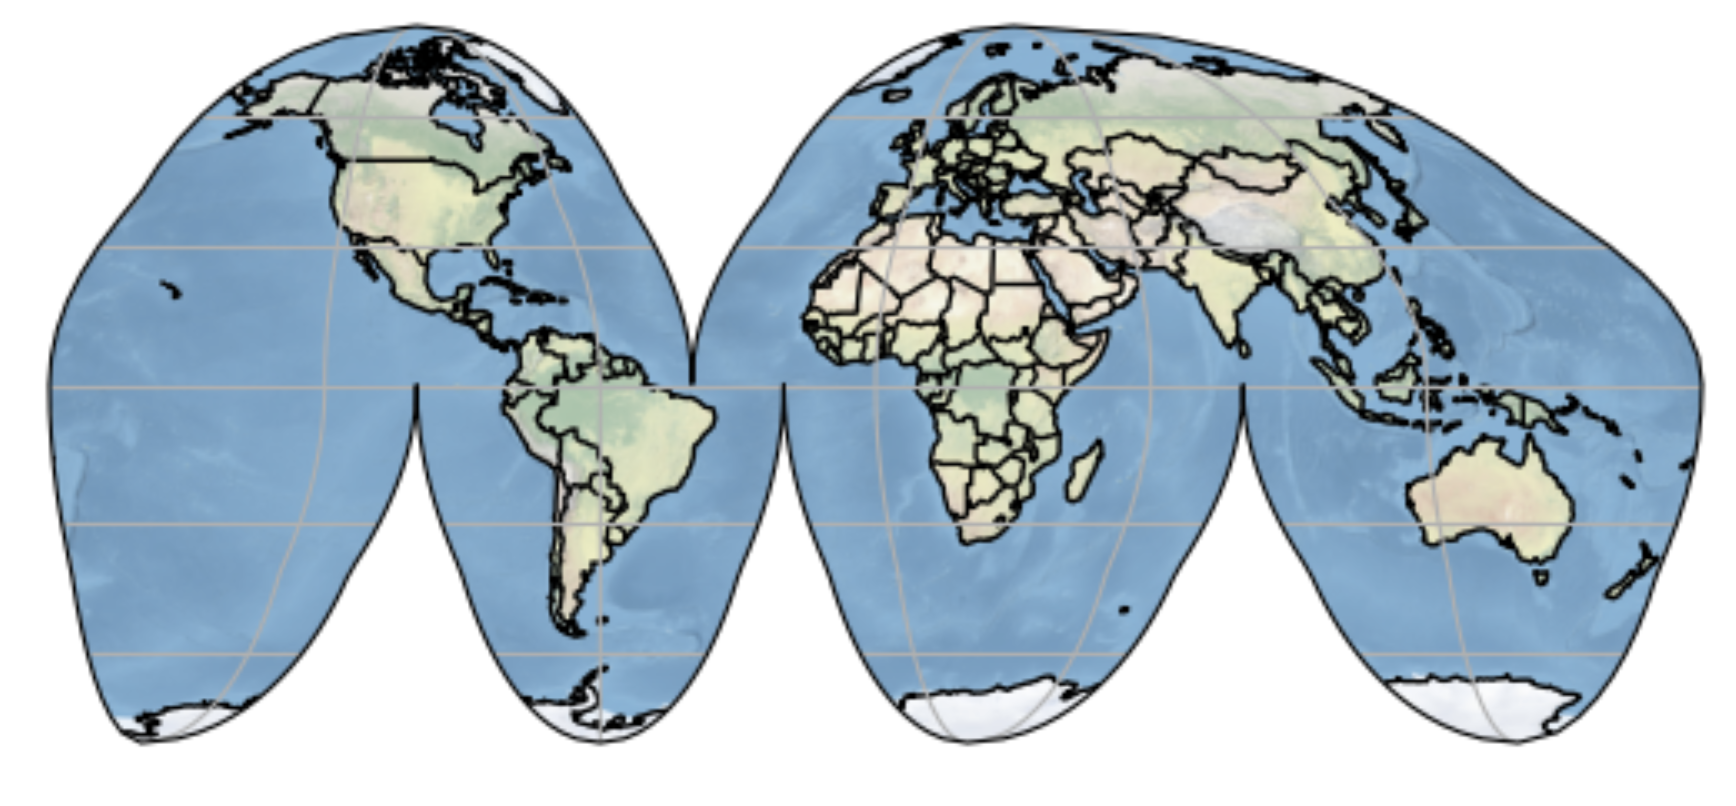

<details>

```
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.InterruptedGoodeHomolosine()})
ax.stock_img()
ax.gridlines()
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
```
</details>

In [ ]:
# Write your code here

## Regional maps

To create a regional map, we use the `set_extent` method of GeoAxes to limit the size of the region. 

Regional maps generally use different projections than global maps with some of the most common being
* Albers Equal Area (mid-latitudes)
* Lambert Conformal (mid-latitudes)
* Lambert Cylindrical (tropics)
* North Polar Stereographic (polar)
* South Polar Stereographic (polar)

### Contiguous United States (CONUS) maps

The `AlbersEqualArea` and `LambertConformal` projections are commonly used for CONUS and other large regional areas in the mid-latitudes. 

The values of `central_longitude`, `central_latitude`, and `standard_parallels` in the example below match the values commonly used by USGS and NOAA for CONUS maps. Their values can be changed for mapping other regions.

In [ ]:
# Map projection for CONUS
ax = plt.axes( projection=ccrs.AlbersEqualArea(central_longitude=-96,
                                               central_latitude=37.5, 
                                               standard_parallels=(29.5,45.5) ))
# ax = plt.axes( projection=ccrs.LambertConformal(central_longitude=-96,
#                                                 central_latitude=39,
#                                                 standard_parallels=(33,45)))

# Set lat-lon of map edges. These are reasonable for CONUS
ax.set_extent([-120, -73, 25, 50], ccrs.PlateCarree())

# Add coasts; Use ‘50m’ resolution for maps of US or smaller
ax.coastlines(resolution='50m')

# Add state borders
ax.add_feature(cfeature.STATES.with_scale('50m'))

## Adding data to a map

After creating the map, we can add data. That's the whole point!

Key point: ***The data must be transformed into the projection plane.*** This is done via the `transform=` keyword in the plotting method.

From the [Cartopy Documentation](https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html):

>    The core concept is that the projection of your axes is independent of the coordinate system your data is defined in. The `projection` argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.


In [ ]:
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines()
ax.set_global()

ax.pcolormesh(lon2d_edge, lat2d_edge, data2d, transform=ccrs.PlateCarree() )
ax.scatter(plon, plat, c=pdata, transform=ccrs.PlateCarree() )

In [ ]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
ax.set_global()

ax.pcolormesh(lon2d_edge, lat2d_edge, data2d, transform=ccrs.PlateCarree() )
ax.scatter(plon, plat, c=pdata, transform=ccrs.PlateCarree() )


#### Exercise

Make a global map with Equal Earth projection. Add coastlines. Add point at 30°N, 90°E. Make the point red.  

The result should look like this
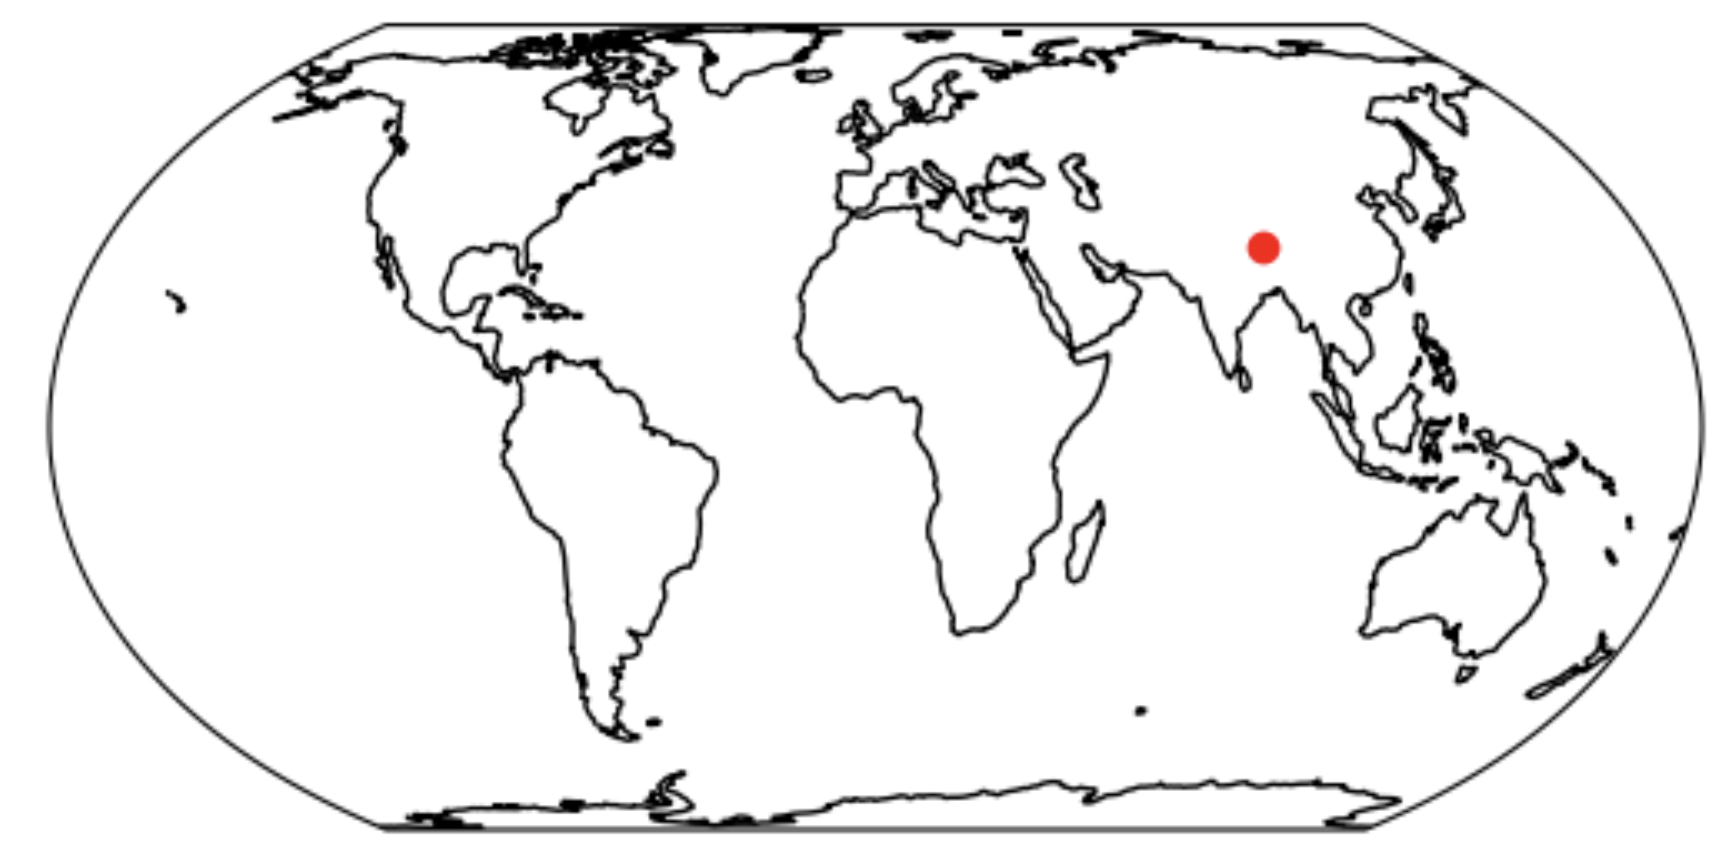

<details>

```
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines()
ax.set_global()

# Two ways of plotting a red dot
ax.scatter([90], [30], 
           transform=ccrs.PlateCarree(),
           color='red')
ax.plot([90], [30], 
           transform=ccrs.PlateCarree(),
           color='red', marker='o')
```
</details>

In [ ]:
# Write your code here

## Xarray integration

Cartopy transforms can be passed to xarray! This creates a very quick path for creating professional looking maps from netCDF data.

In [ ]:
import xarray as xr
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ersst = xr.open_dataset(url)
ersst

In [ ]:
ax = plt.axes(projection=ccrs.EqualEarth())
ax.coastlines()
ax.set_global()

ersst['sst'].isel(time=-1).plot( ax=ax, transform=ccrs.PlateCarree(), 
                                 vmin=2, vmax=30, cbar_kwargs={'shrink': 0.4})

## NASA GIBS

The [NASA GIBS](https://www.earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/gibs) server provides a lot of Earth imagery and geospatial data through the Web Map Service (WMS). See 
[NASA Worldview](https://worldview.earthdata.nasa.gov) to check out the available imagery. [GIBS Product catalog](https://nasa-gibs.github.io/gibs-api-docs/available-visualizations/#visualization-product-catalog)

In [ ]:
# Address for GIBS data
# epsg3857 (Web Mercator) and epsg4326 (Cylindrical Equirectangular, i.e. PlateCarree) are both fine for most purposes
# epsg3413 for Arctic 
# epsg3031 for Antarctic
gibs_url = 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi'

# Map projection for CONUS
ax = plt.axes( projection=ccrs.AlbersEqualArea(central_longitude=-96,
                                               central_latitude=37.5, 
                                               standard_parallels=(29.5,45.5) ))

# Set lat-lon of map edges. These are reasonable for CONUS
ax.set_extent([-90, -75, 25, 30], ccrs.PlateCarree())
ax.add_wms( gibs_url, 'MODIS_Aqua_CorrectedReflectance_TrueColor', 
                wms_kwargs={'time': '2025-03-01'} ) 

Some interesting GIBS products:
* BlueMarble_NextGeneration 
* VIIRS_Black_Marble 
* MODIS_Aqua_CorrectedReflectance_TrueColor - daily, 250 m resolution, also available from Terra instead of Aqua
* VIIRS_SNPP_CorrectedReflectance_TrueColor - daily, 250 m resolution, also available from NOAA20 instead of SNPP
* Landsat_WELD_CorrectedReflectance_TrueColor_Global_Annual - 30 m resolution, also available monthly
* GOES-East_ABI_GeoColor - 10 minute, 1 km, aslo available from GOES-West and HIMAWARI
* GPW_Population_Density_2020 - also 2000, 2005, 2010, 2015
* Reference_Features_15m - coastlines, borders, roads
* Reference_Labels_15m - place names
* ASTER_GDEM_Color_Shaded_Relief - terrain altitude, also Index instead of Shaded_Relief
* MODIS_Combined_Thermal_Anomalies_All, VIIRS_NOAA20_Thermal_Anomalies_375m_All, VIIRS_SNPP_Thermal_Anomalies_375m_All 

In [ ]:
# Create the plot axes with desired projection
fig, axs  = plt.subplots( nrows=2, ncols=1, 
            subplot_kw=dict(projection=ccrs.EqualEarth()),
             figsize=(8,6) )

# Population density
axs[0].add_wmts( wmts, 'GPW_Population_Density_2020' ) 

# MODIS and MODIS fire detections
# Note that this uses WMS because fire detections is a vector object
axs[1].add_wms( 'https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi',
                ['MODIS_Aqua_CorrectedReflectance_TrueColor',
                 'MODIS_Combined_Thermal_Anomalies_All', ], 
                wms_kwargs={'time': '2024-01-01',
                            'transparent':True} ) 

## Cartopy workflow summary
1. Import `cartopy.crs` and often also `cartopy.feature`
2. Define the data coordinate reference system, usually `ccrs.PlateCarree()`
3. Define the map projection (e.g. `ccrs.EqualEarth()` for global maps)
4. Add data to the map
5. Add geographic features

## Doing More
Browse the [Cartopy Gallery](https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) to learn about all the different types of data and plotting methods available!